In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scenario_data(df):
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1)
    df = df.groupby("state_name").mean()
    #df = df[df.state_name != "preflight"]
    try:
        df = df.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now
    except KeyError:
        df = df.drop(["preflight"]) 
    fig = plt.figure(figsize=(10, 5))
    ax = df.plot(kind = "bar", figsize=(5, 4))
    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    plt.show()
    return df



In [18]:

df_scen1 = pd.read_csv("./data/stress_data_scenario_one__14-05.csv")
#df_scen1_b = pd.read_csv("./data/stress_data_scenario_one.csv")

#df_scen2 = pd.read_csv("./data/stress_data_scenario_two.csv")
#df_scen3 = pd.read_csv("./data/stress_data_scenario_three.csv")

<Figure size 720x360 with 0 Axes>

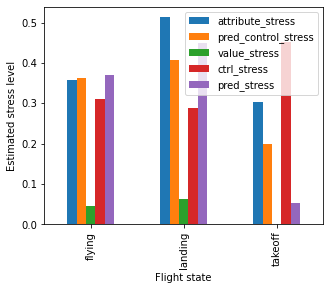

            attribute_stress  pred_control_stress  value_stress  ctrl_stress  \
state_name                                                                     
flying              0.356514             0.361939      0.044738     0.311531   
landing             0.512821             0.406989      0.063562     0.288186   
takeoff             0.302970             0.198503      0.000557     0.452642   

            pred_stress  
state_name               
flying         0.368874  
landing        0.448082  
takeoff        0.053670  


In [19]:

df = plot_scenario_data(df_scen1)
#df2 = plot_scenario_data(df_scen1_b)
print(df)

<Figure size 720x360 with 0 Axes>

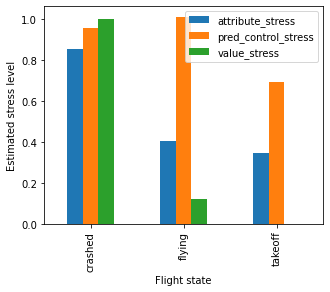

            attribute_stress  pred_control_stress  value_stress
state_name                                                     
crashed             0.854860             0.958365      0.999427
flying              0.403832             1.011750      0.120321
takeoff             0.348043             0.694255      0.000534


In [ ]:
df = plot_scenario_data(df_scen2)
print(df)

<Figure size 720x360 with 0 Axes>

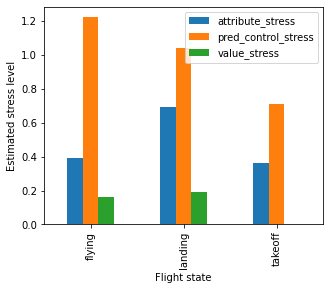

            attribute_stress  pred_control_stress  value_stress
state_name                                                     
flying              0.390580             1.222753      0.160426
landing             0.692023             1.042309      0.189873
takeoff             0.360904             0.709732      0.000360


In [ ]:
df = plot_scenario_data(df_scen3)
print(df)